In [134]:
!pip install mplfinance pandas_ta

In [135]:
# retrieve / store stock data
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta
import pandas as pd
# data manipulation
import numpy as np

# Progress monitor
from tqdm.auto import tqdm

# Feature scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import warnings
warnings.filterwarnings('ignore')

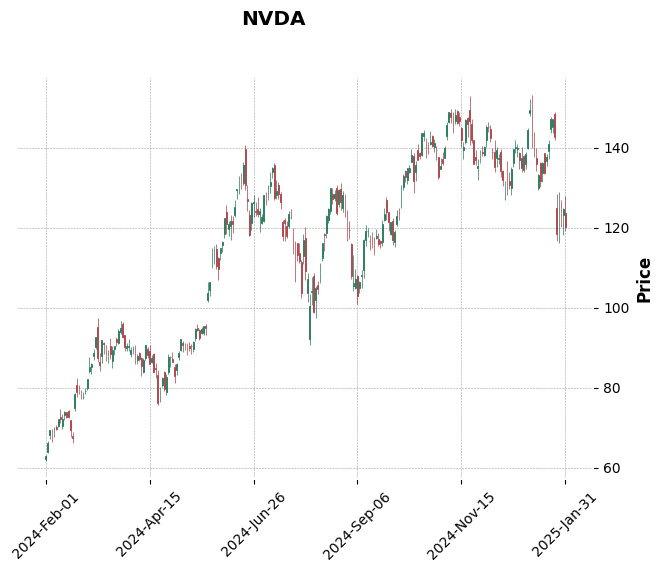

In [136]:
# try draw data
ticker = yf.Ticker('NVDA')
hist = ticker.history(period='1y', )
mpf.plot(hist, type = 'candle', style = 'charles',title = 'NVDA')

In [137]:
hist.ta.macd(append = True)
hist.ta.rsi(append = True)
hist.ta.bbands(append = True)
hist.ta.obv(append = True)
hist.ta.sma(length = 20, append = True)
hist.ta.stoch(append = True)
hist.ta.adx(append = True)
hist.ta.willr(append = True)
hist.ta.cmf(append = True)
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,BBP_5_2.0,OBV,SMA_20,STOCHk_14_3_3,STOCHd_14_3_3,ADX_14,DMP_14,DMN_14,WILLR_14,CMF_20
Date,,,,,,,,,,,,,,,,,,,,,
2024-02-01 00:00:00-05:00,62.082397,63.173091,61.632528,63.009136,369146000,0.0,0.0,NaN,NaN,NaN,...,NaN,3.691460e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-02 00:00:00-05:00,63.955866,66.581121,63.671946,66.141251,476578000,0.0,0.0,NaN,NaN,NaN,...,NaN,8.457240e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-05 00:00:00-05:00,68.205666,69.477309,67.185959,69.312355,680078000,0.0,0.0,NaN,NaN,NaN,...,NaN,1.525802e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-06 00:00:00-05:00,69.610266,69.734231,66.281215,68.203667,683111000,0.0,0.0,NaN,NaN,NaN,...,NaN,8.426910e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-02-07 00:00:00-05:00,68.299630,70.200092,67.580832,70.079124,495575000,0.0,0.0,NaN,NaN,NaN,...,0.768395,1.338266e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,124.800003,128.399994,116.699997,118.419998,818830900,0.0,0.0,-0.608877,-0.756264,0.147387,...,0.013723,4.674042e+09,138.288000,45.068000,59.697615,13.039473,19.715437,39.705178,-95.278614,-0.092895
2025-01-28 00:00:00-05:00,121.809998,129.000000,116.250000,128.990005,579666400,0.0,0.0,-1.213772,-1.088927,-0.124845,...,0.326914,5.253708e+09,137.741000,31.589884,48.311119,14.409088,17.915233,34.943036,-65.455521,0.017640
2025-01-29 00:00:00-05:00,126.500000,126.889999,120.050003,123.699997,467120600,0.0,0.0,-2.095856,-1.576809,-0.519047,...,0.307303,4.786588e+09,137.075500,20.678268,32.445384,15.680873,16.427457,32.041180,-77.231062,0.020318


In [138]:
hist.dropna()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,BBP_5_2.0,OBV,SMA_20,STOCHk_14_3_3,STOCHd_14_3_3,ADX_14,DMP_14,DMN_14,WILLR_14,CMF_20
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-20 00:00:00-04:00,89.775756,90.388617,88.202130,90.350624,479063000,0.0,0.0,5.635412,-0.909115,6.544527,...,0.909066,3.080447e+09,85.322364,58.259980,55.957250,53.858823,34.692426,13.385058,-39.112411,0.149630
2024-03-21 00:00:00-04:00,92.278169,92.626086,90.383613,91.413368,480372000,0.0,0.0,5.522431,-0.817677,6.340108,...,0.873947,3.560819e+09,85.967245,58.743819,57.527300,53.424419,37.462323,12.802461,-42.659004,0.080873
2024-03-22 00:00:00-04:00,91.119435,94.755576,90.812509,94.266693,586719000,0.0,0.0,5.598595,-0.593211,6.191805,...,0.934975,4.147538e+09,86.740847,65.326690,60.776830,53.399930,38.705149,11.840685,-22.248515,0.153519
2024-03-25 00:00:00-04:00,93.918777,96.743105,93.487879,94.979523,552136000,0.0,0.0,5.651329,-0.432381,6.083710,...,0.831634,4.699674e+09,87.536343,72.324135,65.464881,53.683371,40.104537,11.099358,-18.120075,0.168141
2024-03-26 00:00:00-04:00,95.828323,96.352201,92.480116,92.539101,513648000,0.0,0.0,5.433566,-0.520116,5.953681,...,0.475230,4.186026e+09,88.229364,74.355480,70.668768,53.410714,37.126910,12.207637,-36.564969,0.114357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,124.800003,128.399994,116.699997,118.419998,818830900,0.0,0.0,-0.608877,-0.756264,0.147387,...,0.013723,4.674042e+09,138.288000,45.068000,59.697615,13.039473,19.715437,39.705178,-95.278614,-0.092895
2025-01-28 00:00:00-05:00,121.809998,129.000000,116.250000,128.990005,579666400,0.0,0.0,-1.213772,-1.088927,-0.124845,...,0.326914,5.253708e+09,137.741000,31.589884,48.311119,14.409088,17.915233,34.943036,-65.455521,0.017640
2025-01-29 00:00:00-05:00,126.500000,126.889999,120.050003,123.699997,467120600,0.0,0.0,-2.095856,-1.576809,-0.519047,...,0.307303,4.786588e+09,137.075500,20.678268,32.445384,15.680873,16.427457,32.041180,-77.231062,0.020318


In [139]:
# get data used in LSTM
goog_data = yf.Ticker('GOOG').history(period = '10y', back_adjust = True)
goog_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-02-02 00:00:00-05:00,26.418781,26.481880,25.763938,26.257307,56996054,0.0,0.0
2015-02-03 00:00:00-05:00,26.233458,26.501754,25.997953,26.295067,40773638,0.0,0.0
2015-02-04 00:00:00-05:00,26.295066,26.465584,25.899081,25.973110,33273101,0.0,0.0
2015-02-05 00:00:00-05:00,26.024286,26.258301,25.939821,26.212589,36995292,0.0,0.0
2015-02-06 00:00:00-05:00,26.215571,26.690555,26.154458,26.382511,35270570,0.0,0.0
...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,194.190002,198.669998,192.699997,193.770004,24970200,0.0,0.0
2025-01-28 00:00:00-05:00,194.649994,197.229996,192.610001,197.070007,15939200,0.0,0.0
2025-01-29 00:00:00-05:00,197.369995,198.460007,195.190002,197.179993,12287800,0.0,0.0


In [140]:
goog_data.loc[goog_data.index.year<2025]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2015-02-02 00:00:00-05:00,26.418781,26.481880,25.763938,26.257307,56996054,0.0,0.0
2015-02-03 00:00:00-05:00,26.233458,26.501754,25.997953,26.295067,40773638,0.0,0.0
2015-02-04 00:00:00-05:00,26.295066,26.465584,25.899081,25.973110,33273101,0.0,0.0
2015-02-05 00:00:00-05:00,26.024286,26.258301,25.939821,26.212589,36995292,0.0,0.0
2015-02-06 00:00:00-05:00,26.215571,26.690555,26.154458,26.382511,35270570,0.0,0.0
...,...,...,...,...,...,...,...
2024-12-24 00:00:00-05:00,196.169998,197.669998,195.197998,197.570007,6809800,0.0,0.0
2024-12-26 00:00:00-05:00,196.740005,198.160004,195.869995,197.100006,7907900,0.0,0.0
2024-12-27 00:00:00-05:00,196.470001,196.800003,191.972000,194.039993,14693000,0.0,0.0


In [141]:
goog_data.ta.macd(append = True)
goog_data.ta.rsi(append = True)
goog_data.ta.bbands(append = True)
goog_data.ta.obv(append = True)
goog_data.ta.sma(length = 20, append = True)
goog_data.ta.stoch(append = True)
goog_data.ta.adx(append = True)
goog_data.ta.willr(append = True)
goog_data.ta.cmf(append = True)
goog_data.dropna(inplace = True)
goog_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,...,BBP_5_2.0,OBV,SMA_20,STOCHk_14_3_3,STOCHd_14_3_3,ADX_14,DMP_14,DMN_14,WILLR_14,CMF_20
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-20 00:00:00-04:00,27.905343,27.908821,27.776162,27.841248,52337299,0.0,0.0,0.320139,-0.122719,0.442858,...,0.764061,2.849081e+08,27.694644,44.711529,40.213007,21.163644,21.635409,18.043645,-52.092869,0.145476
2015-03-23 00:00:00-04:00,27.844729,27.940620,27.616178,27.764238,32876014,0.0,0.0,0.303998,-0.111088,0.415086,...,0.595751,2.520321e+08,27.761470,44.028789,42.011185,19.353882,20.359240,19.887931,-56.693529,0.152602
2015-03-24 00:00:00-04:00,27.950556,28.548262,27.883483,28.329649,51665459,0.0,0.0,0.332992,-0.065675,0.398667,...,0.992347,3.036975e+08,27.846182,56.099555,48.279957,19.741662,27.963732,17.241316,-22.914938,0.147238
2015-03-25 00:00:00-04:00,28.345052,28.432497,27.760762,27.762997,43045859,0.0,0.0,0.306710,-0.073566,0.380276,...,0.365732,2.606517e+08,27.883234,55.087359,51.738567,19.578283,24.905629,17.353736,-55.129457,0.060390
2015-03-26 00:00:00-04:00,27.703622,27.768709,27.358811,27.583387,31452115,0.0,0.0,0.268295,-0.089584,0.357879,...,0.228577,2.291995e+08,27.882464,52.670280,54.619064,17.983652,23.235780,22.764930,-63.944766,0.007810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-27 00:00:00-05:00,194.190002,198.669998,192.699997,193.770004,24970200,0.0,0.0,2.962070,-0.329071,3.291141,...,0.024563,3.122057e+09,195.422501,64.273173,71.775739,21.142147,26.021560,25.941217,-66.337266,-0.147873
2025-01-28 00:00:00-05:00,194.649994,197.229996,192.610001,197.070007,15939200,0.0,0.0,2.765503,-0.420510,3.186014,...,0.375445,3.137996e+09,195.421001,58.761545,67.018014,19.640161,24.277723,24.333308,-44.598105,-0.099904
2025-01-29 00:00:00-05:00,197.369995,198.460007,195.190002,197.179993,12287800,0.0,0.0,2.588756,-0.477806,3.066562,...,0.433907,3.150284e+09,195.578001,48.397022,57.143913,18.501033,24.925900,23.150733,-43.873563,-0.085709


In [142]:
# prepared data

training_set = goog_data.loc[goog_data.index.year<2024,'Open'].values.reshape(-1,1)
vols = goog_data.loc[goog_data.index.year<2024,'Volume'].values.reshape(-1,1)
len(training_set)

2211

In [143]:
# Feature scaling
scaler = MinMaxScaler(feature_range = (0,1))
scaled_train = scaler.fit_transform(training_set)
scaled_train

stdscaler = StandardScaler()
scaled_vol = stdscaler.fit_transform(vols)
scaled_vol

array([[ 1.32996828],
       [ 0.06875224],
       [ 1.28642874],
       ...,
       [-0.94142508],
       [-1.27167207],
       [-1.09797793]])

In [144]:
# prepare data for training, set steps that determine how many days would as based on to do prediction
timestep = 30
X_train, y_train = [],[]

for i in tqdm(range(timestep, len(scaled_train))):
    # put i-timestep~i-1 as feature, i as output
    x_data = list(scaled_train[i-timestep:i].flatten())
    x_data.extend(scaled_vol[i-1])
    x_data.extend(goog_data.iloc[i-1,7:10])
    X_train.append(x_data)
    y_train.append(scaled_train[i])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))
X_train.shape, y_train.shape

  0%|          | 0/2181 [00:00<?, ?it/s]

((2181, 34, 1), (2181, 1))

In [145]:
# build LSTM
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

regressor = Sequential(name = 'LSTM_4Layers')
regressor.add(LSTM(units=50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=100, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=150, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

regressor.compile(optimizer = 'adam', loss = 'mse')

regressor.summary()

Model: "LSTM_4Layers"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_24 (LSTM)                       │ (None, 34, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_24 (Dropout)                 │ (None, 34, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_25 (LSTM)                       │ (None, 34, 100)             │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_25 (Dropout)                 │ (None, 34, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_26 (LSTM)                       │ (None, 34, 150)             │         150,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_26 (Dropout)                 │ (None, 34, 150)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_27 (LSTM)                       │ (None, 50)                  │          40,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_27 (Dropout)                 │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 261,651 (1022.07 KB)

 Trainable params: 261,651 (1022.07 KB)

 Non-trainable params: 0 (0.00 B)

In [146]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
es = EarlyStopping(
    monitor='val_loss',
    patience = 5,
    verbose = 1,
    restore_best_weights = False
)

rlrop = ReduceLROnPlateau(
    monitor = 'val_loss',
    factor = 0.5, # by which lr will reduce
    patience = 3,
    verbose = 1,
    min_delta = 0.0001
)

In [147]:
regressor.fit(X_train, y_train, epochs=100,batch_size = 32, shuffle = False, validation_split = 0.2, callbacks = [es, rlrop])

Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0013 - val_loss: 0.0055 - learning_rate: 0.0010
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0190 - val_loss: 0.0083 - learning_rate: 0.0010
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0318 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 4/100
53/55 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0896
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0864 - val_loss: 0.0205 - learning_rate: 0.0010
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0951 - val_loss: 0.0385 - learning_rate: 5.0000e-04
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0282 - val_loss: 0.0097 - learning_rate: 5.0000e-04
Epoch 6: early stopping


In [148]:
regressor.evaluate(X_train, y_train)

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0030


0.0054870606400072575

In [149]:
# predict 2024 stock_price
y_test = goog_data.loc[goog_data.index.year==2024,'Open'].values
input_data_all = pd.concat([goog_data.loc[goog_data.index.year<2024].iloc[-timestep:],goog_data.loc[goog_data.index.year==2024]], axis = 0)
input_data = input_data_all.Open.values
input_data = np.array(input_data).reshape(-1,1)
input_data = scaler.transform(input_data)
input_vol = stdscaler.transform(input_data_all.Volume.values.reshape(-1,1))
input_data.shape, y_test.shape

((282, 1), (252,))

In [150]:
X_test = []
for i in range(timestep,len(input_data)):
    x_data = list(input_data[i-timestep:i].flatten())
    x_data.extend(input_vol[i-1])
    x_data.extend(input_data_all.iloc[i-1,7:10])
    X_test.append(x_data)
X_test = np.array(X_test)
X_test = X_test.reshape(-1, X_test.shape[1],1)
X_test.shape

(252, 34, 1)

In [151]:
y_pred = regressor.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


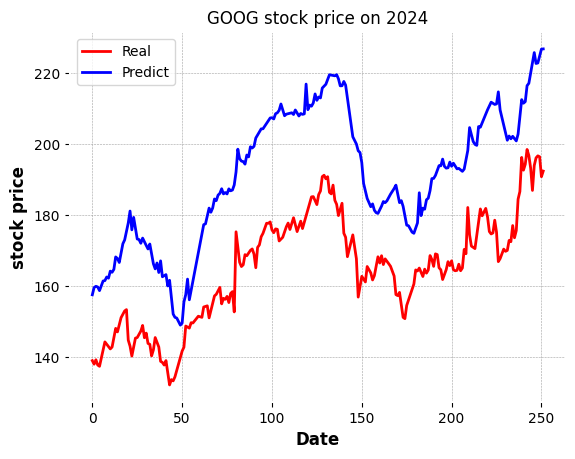

In [152]:
# visualize result
import matplotlib.pyplot as plt

plt.plot(y_test,color = 'r',label = 'Real')
plt.plot(y_pred,color = 'b',label = 'Predict')
plt.title('GOOG stock price on 2024')
plt.xlabel('Date')
plt.ylabel('stock price')
plt.legend()
plt.show()